In [31]:
#!pip install "notebook>=5.3" "ipywidgets>=7.2"
#!pip install -U ipykernel
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"

# !cd /content/gdrive/My\ Drive/ift6390_final_project/scikit_classifiers.py
# !cat '/content/gdrive/My Drive/ift6390_final_project/scikit_classifiers.py'

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# #https://drive.google.com/open?id=1WnxkrjBglI8nbZk3XTL3CaoXII-ilMTQ
# your_module = drive.CreateFile({'id':'[1WnxkrjBglI8nbZk3XTL3CaoXII-ilMTQ]'})
# your_module.GetContentFile('scikit_classifiers.py')

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/ift6390_final_project"

# from google.colab import files
# src = list(files.upload().values())[0]
# open('scikit_classifiers.py','wb').write(src)
# import scikit_classifiers

#!pip install "notebook>=5.3" "ipywidgets>=7.2"
from scikit_classifiers import main
from scikit_classifiers import read_dataset
from scikit_classifiers import VALID_DATASET_NAMES as _DATASETS
from scikit_classifiers import CLASSIFIERS
import plotly.graph_objects as go
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get Datasets and Print Features

In [51]:
# # _MODELS = list(CLASSIFIERS.keys())
# # print(f"Models")
# # [print(f"{i}: {m}") for i, m in enumerate(_MODELS)]
# print(f"Datasets")
# _ = [print(f"{i}: {m}") for i, m in enumerate(_DATASETS)]
# print("\n\nHeart Disease Features:")
# HEART_DATASET = _DATASETS[0]
# heart_features, _ = read_dataset(HEART_DATASET, head=True)
# [print(f"{i}: {f}") for i, f in enumerate(heart_features)]

# print("\n\nCervical Cancer Features:")
# CERVICAL_DATASET = _DATASETS[1]
# cervical_features, _ = read_dataset(CERVICAL_DATASET, head=True)
# [print(f"{i}: {f}") for i, f in enumerate(cervical_features)]

In [52]:
# heart_x, heart_y = read_dataset(HEART_DATASET, head=False)
# print("Size of heart ds", len(heart_x))
# assert len(heart_x) == len(heart_y)

# cervical_x, cervical_y = read_dataset(CERVICAL_DATASET, head=False)
# print("\nSize of cervical ds", len(cervical_x))
# assert len(cervical_x) == len(cervical_y)


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Heart Disease Dataset")
heart_df = pd.read_csv('./data/heart-statlog/data/heart-statlog_csv.csv')
print("COLUMNS", heart_df.columns)
print("SIZE",heart_df.size)
print(heart_df.describe)


Heart Disease Dataset
COLUMNS Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', 'class'],
      dtype='object')
SIZE 3780
<bound method NDFrame.describe of      age  sex  chest  resting_blood_pressure  serum_cholestoral  \
0     70    1      4                     130                322   
1     67    0      3                     115                564   
2     57    1      2                     124                261   
3     64    1      4                     128                263   
4     74    0      2                     120                269   
..   ...  ...    ...                     ...                ...   
265   52    1      3                     172                199   
266   44    1      2                     120                263   
267   56    0    

In [64]:
heart_df.dtypes

age                                       int64
sex                                       int64
chest                                     int64
resting_blood_pressure                    int64
serum_cholestoral                         int64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
maximum_heart_rate_achieved               int64
exercise_induced_angina                   int64
oldpeak                                 float64
slope                                     int64
number_of_major_vessels                   int64
thal                                      int64
class                                    object
dtype: object

In [65]:
# There is no missing data in heart dataset, where 0 means no missing data
heart_df.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [63]:
print("Min age: {}".format(heart_df['age'].min()))
print("Max age: {}".format(heart_df['age'].max()))

Min age: 29
Max age: 77


# Data visualization

## Bar plots

Text(0, 0.5, 'Count')

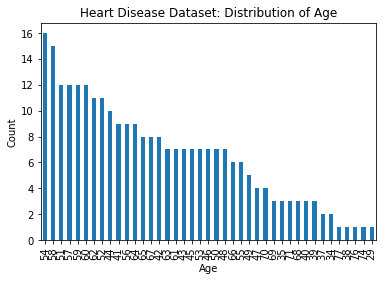

In [89]:
heart_df['age'].value_counts().plot(
    kind='bar',
    title='Heart Disease Dataset: Distribution of Age'
)
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

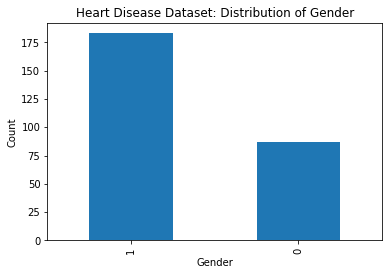

In [90]:
heart_df['sex'].value_counts().plot(
    kind='bar',
    title='Heart Disease Dataset: Distribution of Gender'
)
plt.xlabel('Gender')
plt.ylabel('Count')

In [73]:
print("Cervical Cancer Dataset")
cervical_df = pd.read_csv('./data/cervical-cancer/data/cervical-cancer_csv.csv')
print("COLUMNS", cervical_df.columns)
print("SIZE",cervical_df.size)
print(cervical_df.describe)

Cervical Cancer Dataset
COLUMNS Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')
SIZE 30060
<bound method NDFrame.describe of      Age  Number of sexual partners  First sexual intercourse  \
0     18                       

In [66]:
# There's a lot of missing data in cervical dataset, where 0 means no missing data
cervical_df.isna().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

Text(0, 0.5, 'count')

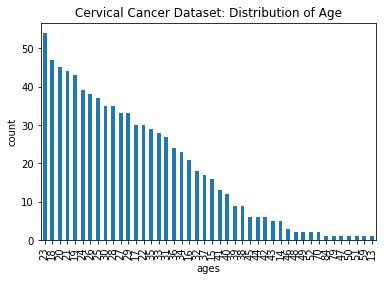

In [88]:
cervical_df['Age'].value_counts().plot(
    kind='bar',
    title='Cervical Cancer Dataset: Distribution of Age'
)
plt.xlabel('Age')
plt.ylabel('Count')
